In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Подготовка данных

In [3]:
x_train = x_train/255
x_test = x_test/255

y_train_out = keras.utils.to_categorical(y_train, 10)
y_test_out = keras.utils.to_categorical(y_test, 10)

- Создание модели нейронной сети с одним скрытым слоем размером 128.
- В скрю слое используется функция активации "relu", в выходном слое "softmax"

In [5]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


- "Adam" - оптимизатор для стохастического градиентного спуска.
- 'categorical_crossentropy' - функция потерь часто используемая для задач классификации.
- "accuracy" - точность. Метрика, которая измеряет процент правильных классификаций.

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Обучение сети
- batch_size - количество изображений в пакете.
- validation_split - доля данных для валидации.

In [7]:
model.fit(x_train, y_train_out, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2908 - accuracy: 0.9162 - val_loss: 0.1615 - val_accuracy: 0.9548
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1288 - accuracy: 0.9621 - val_loss: 0.1207 - val_accuracy: 0.9632
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9732 - val_loss: 0.0969 - val_accuracy: 0.9710
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9803 - val_loss: 0.0967 - val_accuracy: 0.9696
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0490 - accuracy: 0.9855 - val_loss: 0.0881 - val_accuracy: 0.9743


Вывод результата обучения

In [8]:
model.evaluate(x_test, y_test_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9757


[0.07838310301303864, 0.9757000207901001]

Проверка

1/1 [==============================] - 0s 27ms/step
[[5.7108673e-10 3.1429101e-07 9.9970978e-01 2.8960020e-04 1.3903246e-09
  2.1256633e-10 1.4238546e-07 2.6015279e-10 8.1944556e-08 3.6278433e-12]]
I think this is number: 2


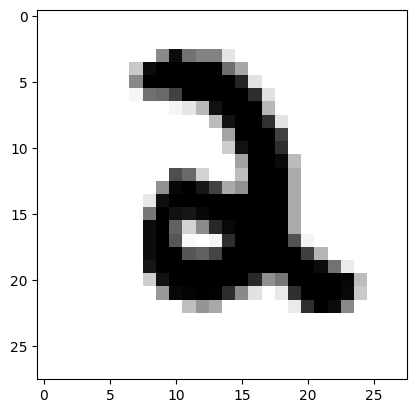

In [13]:
import random
n = random.randint(0,1000)

x = np.expand_dims(x_test[n], axis=0)

res = model.predict(x)
print(res)
print(f"I think this is number: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()